<b>SUMMARY:</b><br/> The goal is to analyze Suicides dataset to find out if there is a relation between suicides and GDP. The data includes suicides information from 101 countries for a span of 30 years (1984 to 2014) along with gender and GDP.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fields = ['country', 'year','sex','age','suicides_no','population','HDI for year',' gdp_for_year ($) ','gdp_per_capita ($)','generation']
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\Exercises (my work)\Kaggle datasets for capstone\suicide data.csv",usecols=fields)
df.rename(columns={' gdp_for_year ($) ':'gdp_for_year_in_dollars',
                          'gdp_per_capita ($)':'gdp_per_capita_in_dollars',
                          'HDI for year':'HDI_for_year'}, 
                 inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_in_dollars,gdp_per_capita_in_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900",796,Boomers


In [5]:
#Aggregate suicide data per country per year
df_aggby_ctry_yr = (df.groupby(['country','year']).agg({'population':sum,'suicides_no':sum,'gdp_per_capita_in_dollars':max})).reset_index()
df_aggby_ctry_yr['suicides_per_100k_people'] = round((100000 * df_aggby_ctry_yr['suicides_no']) / df_aggby_ctry_yr['population'],2)
df_aggby_ctry_yr.head(30)

,country,year,population,suicides_no,gdp_per_capita_in_dollars,suicides_per_100k_people
0,Albania,1987,2709600,73,796,2.69
1,Albania,1988,2764300,63,769,2.28
2,Albania,1989,2803100,68,833,2.43
3,Albania,1992,2822500,47,251,1.67
4,Albania,1993,2807300,73,437,2.60
5,Albania,1994,2849300,50,697,1.75
6,Albania,1995,2903400,88,835,3.03
7,Albania,1996,2940200,89,1127,3.03
8,Albania,1997,2977300,170,793,5.71
9,Albania,1998,3012700,154,899,5.11


In [18]:
df_cnt_years_by_country = (df_aggby_ctry_yr.groupby(['country']).agg({'year':'count','gdp_per_capita_in_dollars':'mean'})).reset_index()

#consider countries that have data for more than 25 years
df_cnt_years_by_country = df_cnt_years_by_country[df_cnt_years_by_country.year>25]
print('{}, count:{}, mean of GDP:{}'.format(df_cnt_years_by_country,len(df_cnt_years_by_country),np.mean(df_cnt_years_by_country.gdp_per_capita_in_dollars)))

                country  year  gdp_per_capita_in_dollars
1   Antigua and Barbuda    27               10448.185185
2             Argentina    31                7914.096774
5             Australia    30               32776.400000
6               Austria    32               34328.000000
12              Belgium    31               32066.741935
13               Belize    28                4006.464286
15               Brazil    31                6091.483871
16             Bulgaria    30                3640.433333
18               Canada    29               30887.482759
19                Chile    31                7493.064516
20             Colombia    31                3708.967742
21           Costa Rica    30                5149.700000
25       Czech Republic    27               12413.592593
28              Ecuador    31                3286.258065
32              Finland    29               35468.275862
33               France    30               31481.466667
35              Germany    26  

In [29]:
#take the above 53 countries that have atleast 25 years of data and find out the correlation between number of suicides and GDP
df_aggby_ctry_yr = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(df_cnt_years_by_country['country'])]

df_corr = (df_aggby_ctry_yr.groupby('country')[['suicides_per_100k_people','gdp_per_capita_in_dollars']].corr(method='pearson').iloc[0::2,-1]).reset_index()
df_corr.rename(columns={'gdp_per_capita_in_dollars':'correlation_value'}, inplace=True)
df_corr

,country,level_1,correlation_value
0,Antigua and Barbuda,suicides_per_100k_people,0.102811
1,Argentina,suicides_per_100k_people,-0.234871
2,Australia,suicides_per_100k_people,-0.531922
3,Austria,suicides_per_100k_people,-0.925849
4,Belgium,suicides_per_100k_people,-0.741927
5,Belize,suicides_per_100k_people,0.551842
6,Brazil,suicides_per_100k_people,0.836166
7,Bulgaria,suicides_per_100k_people,-0.928723
8,Canada,suicides_per_100k_people,-0.813381
9,Chile,suicides_per_100k_people,0.741364


In [35]:
#count the countries that have a correlation greater than 0.5 and less than -0.5
df_corr_filter = df_corr.query('correlation_value >= 0.5 or correlation_value <= -0.5')[['country','correlation_value']]
df_corr_filter

,country,correlation_value
2,Australia,-0.531922
3,Austria,-0.925849
4,Belgium,-0.741927
5,Belize,0.551842
6,Brazil,0.836166
7,Bulgaria,-0.928723
8,Canada,-0.813381
9,Chile,0.741364
12,Czech Republic,-0.770740
13,Ecuador,0.506676


In [37]:
print('count of countries that have high correlation from 53 countries: ',len(df_corr_filter))
print('Number of countries with a positive correlation: ',len(df_corr_filter[df_corr_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_filter[df_corr_filter.correlation_value<0]))

count of countries that have high correlation from 53 countries:  36
Number of countries with a positive correlation:  12
Number of countries with a negative correlation:  24


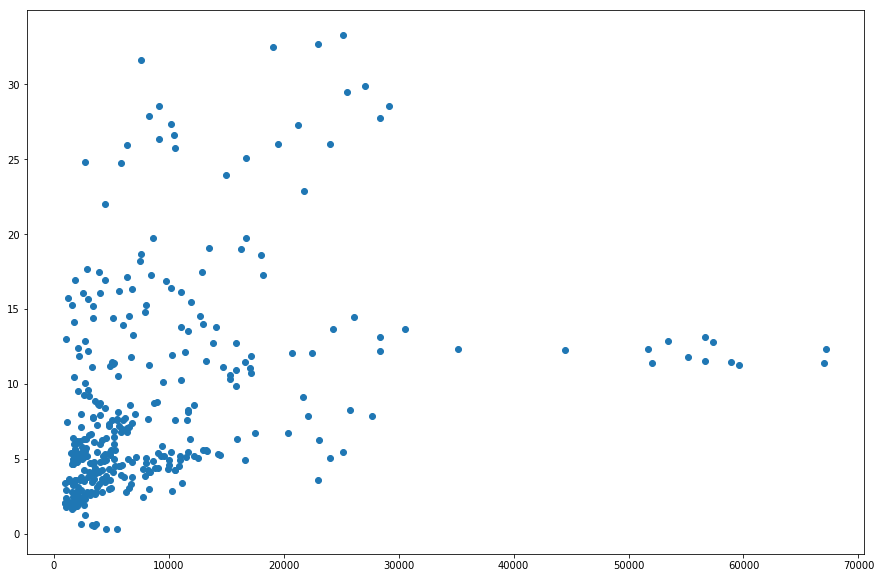

In [50]:
df_scatter_pc = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(df_corr_filter[df_corr_filter.correlation_value>0]['country'])]
plt.rcParams['figure.figsize'] = [15, 10]
N = len(df_scatter_pc)
x = df_scatter_pc['gdp_per_capita_in_dollars']
y = df_scatter_pc['suicides_per_100k_people']
plt.scatter(x, y)
plt.show()

In [49]:
#countries and their GDPs with +ve correlation
df_countries_pc = df_cnt_years_by_country[df_cnt_years_by_country.country.isin(df_corr_filter[df_corr_filter.correlation_value>0]['country'])]
print(df_countries_pc.sort_values('gdp_per_capita_in_dollars'))
print('Min GDP: {}, Max GDP: {}'.format(min(df_countries_pc.gdp_per_capita_in_dollars),max(df_countries_pc.gdp_per_capita_in_dollars)))

              country  year  gdp_per_capita_in_dollars
38          Guatemala    30                2263.533333
67           Paraguay    27                2365.777778
28            Ecuador    31                3286.258065
13             Belize    28                4006.464286
88           Suriname    28                4351.964286
15             Brazil    31                6091.483871
58             Mexico    31                7138.451613
19              Chile    31                7493.064516
99            Uruguay    28                7622.071429
56              Malta    31               14044.419355
73  Republic of Korea    31               14801.258065
42            Ireland    30               34230.866667
Min GDP: 2263.5333333333333, Max GDP: 34230.86666666667


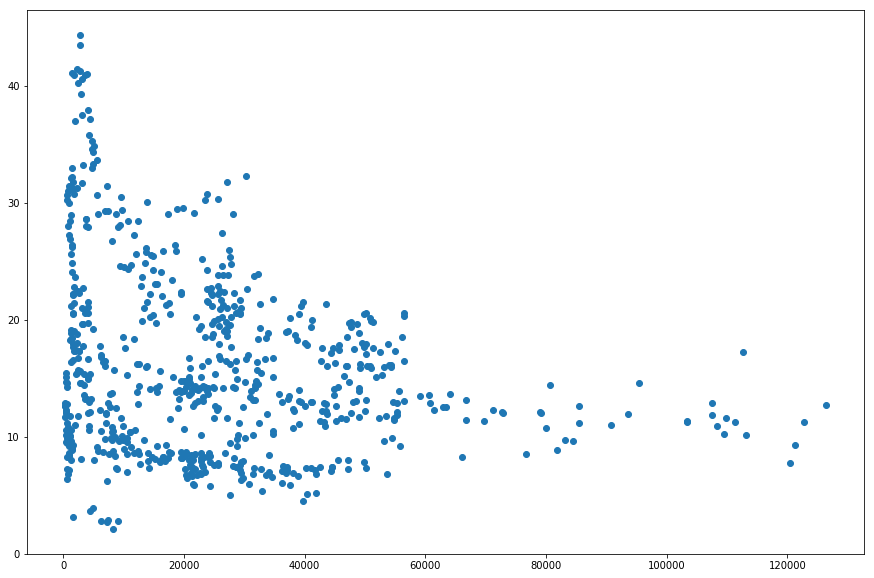

In [51]:
df_scatter_nc = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(df_corr_filter[df_corr_filter.correlation_value<0]['country'])]
plt.rcParams['figure.figsize'] = [15, 10]
N = len(df_scatter_nc)
x = df_scatter_nc['gdp_per_capita_in_dollars']
y = df_scatter_nc['suicides_per_100k_people']
plt.scatter(x, y)
plt.show()

In [52]:
#countries and their GDPs with -ve correlation
df_countries_nc = df_cnt_years_by_country[df_cnt_years_by_country.country.isin(df_corr_filter[df_corr_filter.correlation_value<0]['country'])]
print(df_countries_nc.sort_values('gdp_per_capita_in_dollars'))
print('Min GDP: {}, Max GDP: {}'.format(min(df_countries_nc.gdp_per_capita_in_dollars),max(df_countries_nc.gdp_per_capita_in_dollars)))

               country  year  gdp_per_capita_in_dollars
50          Kyrgyzstan    26                 720.730769
95             Ukraine    28                1867.535714
94        Turkmenistan    29                2618.103448
16            Bulgaria    30                3640.433333
47          Kazakhstan    26                5329.115385
57           Mauritius    32                5533.031250
75  Russian Federation    27                6518.814815
40             Hungary    26                9396.192308
25      Czech Republic    27               12413.592593
71         Puerto Rico    31               18352.645161
43              Israel    31               23125.451613
44               Italy    31               26602.580645
18              Canada    29               30887.482759
33              France    30               31481.466667
97      United Kingdom    31               31908.354839
12             Belgium    31               32066.741935
5            Australia    30               32776